# Abstract
Music Genre classification is very important in today’s world due to rapid growth in music tracks, both online and offline. In order to have better access to these we need to index them accordingly. Automatic music genre classification is important to obtain music from a large collection. Most of the current music genre classification techniques uses machine learning techniques. In this paper, we present a music dataset which includes ten different genres. A Deep Learning approach is used in order to train and classify the system. Here convolution neural network is used for training and classification. Feature Extraction is the most crucial task for audio analysis. Mel Frequency Cepstral Coefficient (MFCC) is used as a feature vector for sound sample. The proposed system classifies music into various genres by extracting the feature vector. Our results show that the accuracy level of our system is around 76% and it will greatly improve and facilitate automatic classification of music genres.


# Dataset Used
For this project, the dataset that we will be working with is the GTZAN Music Genre Classification dataset which consists of 1,000 audio tracks, each 30 seconds long. It contains 10 genres, each represented by 100 tracks.
The 10 genres are Blues, Classical, Country, Disco, Hip-hop, Jazz, Metal, Pop, Reggae, Rock.
The dataset has the following folders:

- Genres original — A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

- Images original — A visual representation for each audio file. One way to classify data is through neural networks because NN’s usually take in some sort of image representation.

- 2 CSV files — Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs are split before into 3 seconds audio files.

GTZAN Dataset with CSV- https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

Original GTZAN Dataset- http://marsyas.info/downloads/datasets.html

# Installing necessary libraries 
(Librosa is used for audio data)

In [1]:
!pip install librosa

In [2]:
!pip install python_speech_features

In [3]:
!pip install tensorflow

In [2]:
!pip install pydot

In [6]:
!pip install pydub

# Importing Libraries

In [61]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from python_speech_features import mfcc
import random

from scipy import misc
import glob
from PIL import Image
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from datetime import datetime
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random

# Understanding the Audio Files

In [20]:
#Understanding Audio
# Importing 1 file
y, sr = librosa.load(f'{location}/classical/classical.00024.wav')

print('y: ', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y:  [-0.03775024 -0.07223511 -0.08242798 ...  0.02264404  0.00308228
 -0.0105896 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [21]:
df=df.drop(labels="filename",axis=1)

In [64]:
audio_recording="C:/Users/Admin/Desktop/ML Project/Datasets/genres/classical/classical.00024.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [65]:
librosa.load(audio_recording,sr)

(array([-0.03775024, -0.07223511, -0.08242798, ...,  0.02264404,
         0.00308228, -0.0105896 ], dtype=float32),
 22050)

# Playing Audio

In [24]:
import IPython
IPython.display.Audio(data,rate=sr)

# Waveforms
Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. 
They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others.

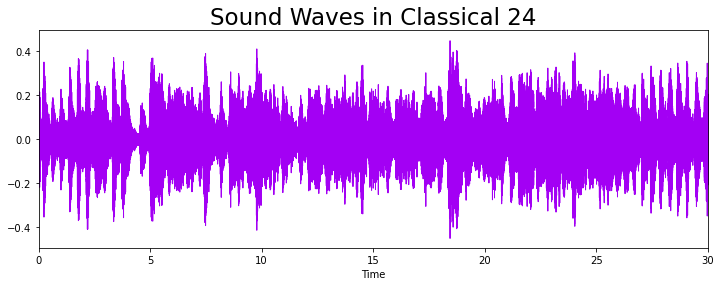

In [25]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#A300F4")
plt.title("Sound Waves in Classical 24", fontsize = 23);
plt.show()

# Mel Spectrogram
Mel spectrogram is a spectrogram that is converted to a Mel scale. The Mel scale mimics how the human ear works, with research showing humans don’t perceive frequencies on a linear scale. Humans are better at detecting differences at lower frequencies than at higher frequencies.

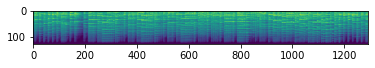

In [66]:
mels = librosa.feature.melspectrogram(data)
fig = plt.Figure()
canvas = FigureCanvas(fig)
p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
p

# MFCC
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.
librosa.feature.mfcc computes MFCCs across an audio signal:

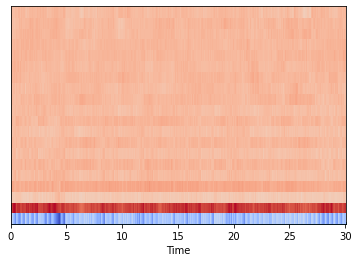

In [26]:
#using classical.00024.wav to display its MFCC
x, fs = librosa.load("C:/Users/Admin/Desktop/ML Project/Datasets/genres/classical/classical.00024.wav")
librosa.display.waveplot(x, sr=sr)
mfccs = librosa.feature.mfcc(x, sr=fs)
(13, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Spectrogram
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time

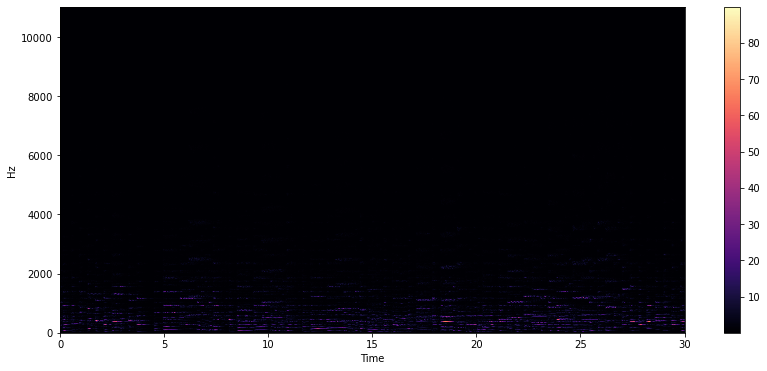

In [27]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

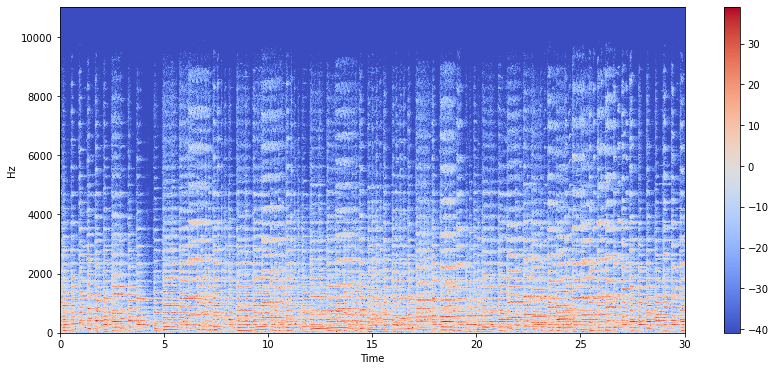

In [28]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

# Spectral Rolloff
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

The roll-off frequency denotes the approximate low bass and high treble limits in a frequency response curve, with all frequencies between being those a speaker will play accurately

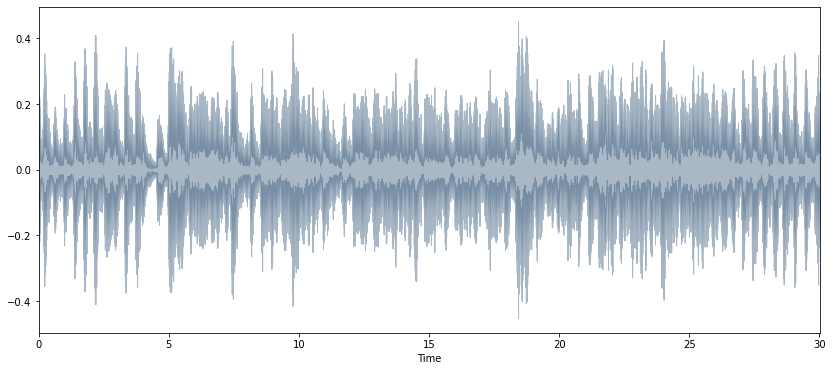

In [29]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

# Chroma Feature
It's a useful tool for studying musical aspects whose pitches may be classified and whose tuning is close to the equal-tempered scale. Chromatic and melodic aspects of music are captured by chroma features, which are resistant to changes in timbre and instrumentation.

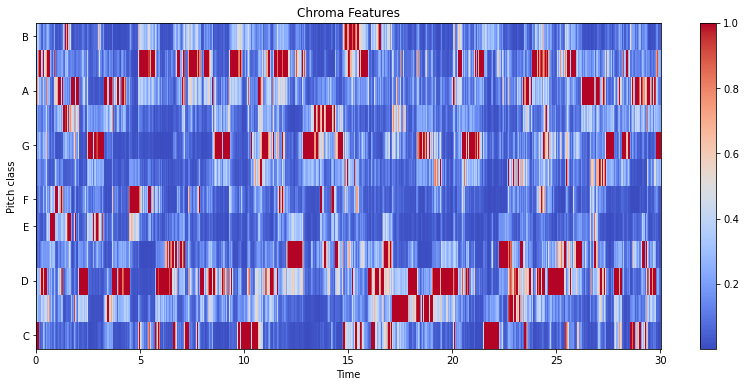

In [30]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Zero Crossing
Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

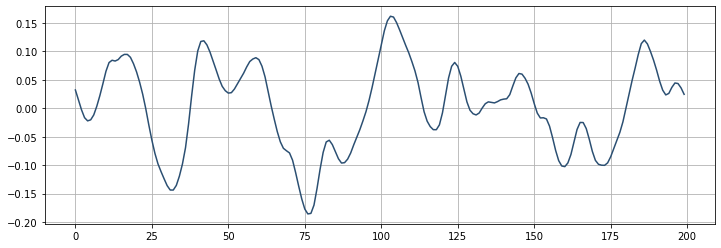

In [31]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [32]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the number of zero_crossings is :", sum(zero_cross_rate))

the number of zero_crossings is : 12


### Therefore in our project, we have decided to generate Mel Spectrograms for all the audio files for the CNN Model

In [10]:
#Displaying the classes
location = 'C:/Users/Admin/Desktop/ML Project/Datasets/genres'
print(list(os.listdir(f'{location}')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [13]:
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test')

In [41]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

In [21]:
#Creating folders for the 3sec audio files and their spectrograms
for g in genres:
  path_audio = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec',f'{g}')
  os.makedirs(path_audio)
  path_train = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train',f'{g}')
  path_test = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test',f'{g}')
  os. makedirs(path_train)
  os. makedirs(path_test)

In [67]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/genres/',f"{g}")):

    song  =  os.path.join(f'C:/Users/Admin/Desktop/ML Project/Datasets/genres/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #pydub calculates in milliseconds so we multiply the values by 1000
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [68]:
for g in genres:
  j = 10
  print(g)
  for filename in os.listdir(os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec',f"{g}")):
    song  =  os.path.join(f'C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec/{g}',f'{filename}')
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    melspecname=(f'C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train/{g}/{g+str(j)}')
    plt.savefig(f'{melspecname}.png', format="png")
    j = j+1

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


<Figure size 432x288 with 0 Axes>

# Splitting the Dataset into a 90:10 split

In [42]:
directory = "C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]

  for f in test_files:
    shutil.move(directory + f"{g}"+ "/" + f,"C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test/" + f"{g}")

# Using Data Generators to further augment the dataset

In [44]:
train_dir = "C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = "C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 9000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [45]:
#defining class labels for prediction
class_labels = ['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',               
 'metal',
 'pop',
 'reggae',
 'rock']

In [46]:
def GenreModel(input_shape = (288,432,4),classes=10):
  np.random.seed(10)
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1),kernel_initializer = glorot_uniform(seed=10))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1),kernel_initializer=glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1),kernel_initializer = glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1),kernel_initializer=glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Flatten()(X)

  X = Dropout(rate=0.3)
    
  X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=10))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [47]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [48]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=2.0)
    
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [49]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
  
model = GenreModel(input_shape=(288,432,4),classes=10)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1]) 

history = model.fit_generator(train_generator,epochs=70,validation_data=vali_generator)

Epoch 1/70
71/71 [==============================] - 577s 8s/step - loss: 1.9981 - accuracy: 0.4464 - get_f1: 0.4188 - val_loss: 2.2871 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 2/70
71/71 [==============================] - 539s 8s/step - loss: 0.9346 - accuracy: 0.6539 - get_f1: 0.6289 - val_loss: 3.1366 - val_accuracy: 0.1000 - val_get_f1: 0.1113
Epoch 3/70
71/71 [==============================] - 518s 7s/step - loss: 0.7625 - accuracy: 0.7278 - get_f1: 0.7145 - val_loss: 3.9201 - val_accuracy: 0.1000 - val_get_f1: 0.1012
Epoch 4/70
71/71 [==============================] - 532s 7s/step - loss: 0.6452 - accuracy: 0.7732 - get_f1: 0.7640 - val_loss: 2.6530 - val_accuracy: 0.3560 - val_get_f1: 0.3687
Epoch 5/70
71/71 [==============================] - 549s 8s/step - loss: 0.4742 - accuracy: 0.8378 - get_f1: 0.8329 - val_loss: 1.5343 - val_accuracy: 0.5560 - val_get_f1: 0.5692
Epoch 6/70
71/71 [==============================] - 546s 8s/step - loss: 0.4365 - accuracy: 0.8408 - 

71/71 [==============================] - 522s 7s/step - loss: 0.0060 - accuracy: 0.9990 - get_f1: 0.9991 - val_loss: 0.7202 - val_accuracy: 0.8370 - val_get_f1: 0.8378
Epoch 47/70
71/71 [==============================] - 567s 8s/step - loss: 0.0042 - accuracy: 0.9991 - get_f1: 0.9991 - val_loss: 0.7137 - val_accuracy: 0.8370 - val_get_f1: 0.8397
Epoch 48/70
71/71 [==============================] - 543s 8s/step - loss: 0.0070 - accuracy: 0.9988 - get_f1: 0.9988 - val_loss: 0.7262 - val_accuracy: 0.8400 - val_get_f1: 0.8420
Epoch 49/70
71/71 [==============================] - 525s 7s/step - loss: 0.0059 - accuracy: 0.9991 - get_f1: 0.9991 - val_loss: 0.7288 - val_accuracy: 0.8380 - val_get_f1: 0.8407
Epoch 50/70
71/71 [==============================] - 521s 7s/step - loss: 0.0092 - accuracy: 0.9979 - get_f1: 0.9977 - val_loss: 0.7324 - val_accuracy: 0.8330 - val_get_f1: 0.8334
Epoch 51/70
71/71 [==============================] - 515s 7s/step - loss: 0.0054 - accuracy: 0.9990 - get_f1: 0.

# Model Results

In [50]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 288, 432, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 286, 430, 8)       296       
_________________________________________________________________
batch_normalization (BatchNo (None, 286, 430, 8)       32        
_________________________________________________________________
activation (Activation)      (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 213, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 141, 213, 16)      6

In [51]:
history.history

{'loss': [1.998122215270996,
  0.9346068501472473,
  0.7625085115432739,
  0.6451578736305237,
  0.47415417432785034,
  0.4365347921848297,
  0.3457659184932709,
  0.29043489694595337,
  0.2711506485939026,
  0.1893102377653122,
  0.15677066147327423,
  0.12895430624485016,
  0.10626860707998276,
  0.09508618712425232,
  0.0738464817404747,
  0.0444365069270134,
  0.04107418656349182,
  0.04236818850040436,
  0.042251989245414734,
  0.022287897765636444,
  0.03542459383606911,
  0.019175902009010315,
  0.012593332678079605,
  0.017932375892996788,
  0.014066782779991627,
  0.01375651452690363,
  0.009988675825297832,
  0.01705988310277462,
  0.029690628871321678,
  0.01397728081792593,
  0.011807087808847427,
  0.011717172339558601,
  0.019196799024939537,
  0.01755148358643055,
  0.02121875248849392,
  0.014017938636243343,
  0.029783030971884727,
  0.1540800929069519,
  0.2670230269432068,
  0.18427440524101257,
  0.0356188639998436,
  0.011994610540568829,
  0.006811387836933136,
  

<Figure size 1440x1080 with 0 Axes>

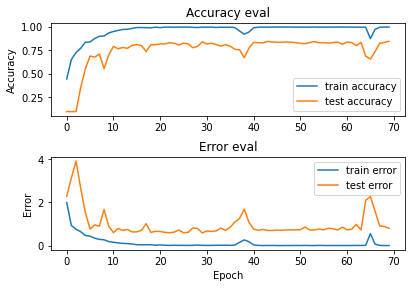

In [52]:
plot_history(history)

Validation Accuracy 0.8479999899864197


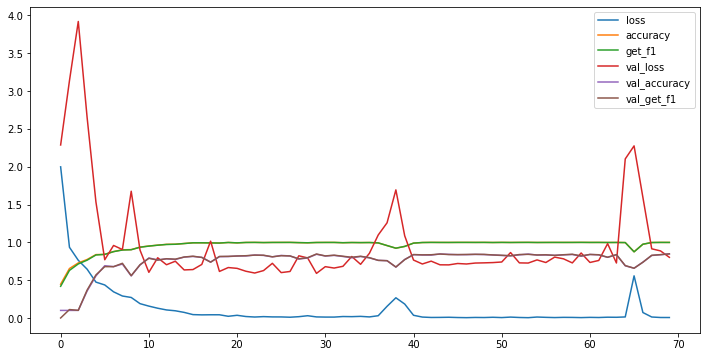

In [53]:
plotValidate(history)

# Predicting the Genre of a random song using the Model

In [54]:
def convert_mp3_to_wav(music_file):
  sound = AudioSegment.from_mp3(music_file)
  sound.export("music_file.wav",format="wav")

In [55]:
def extract_relevant(s,t1,t2):
  wav_file = os.path.join(f'C:/Users/Admin/Desktop/ML Project/Datasets/sample/',f'{s}')
  wav = AudioSegment.from_wav(wav_file)
  wav = wav[1000*t1:1000*t2]
  wav.export("extracted.wav",format='wav')

In [56]:
def create_melspectrogram(wav_file):
  y,sr = librosa.load(wav_file,duration=3)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig('melspectrogram.png')

In [57]:
def predict(image_data,model):

  image = img_to_array(image_data)

  image = np.reshape(image,(1,288,432,4))

  prediction = model.predict(image/255)

  prediction = prediction.reshape((10,)) 

  class_label = np.argmax(prediction)

  return class_label,prediction


In [58]:
def show_output(songname):
  extract_relevant(songname,40,50)
  create_melspectrogram("extracted.wav") 
  image_data = load_img('melspectrogram.png',color_mode='rgba',target_size=(288,432))

  class_label,prediction = predict(image_data,model)

  print("## The Genre of Song is ",class_labels[class_label])

  prediction = prediction.reshape((10,)) 
  
  color_data = [1,2,3,4,5,6,7,8,9,10]
  my_cmap = cm.get_cmap('jet')
  my_norm = Normalize(vmin=0, vmax=10)

  fig,ax= plt.subplots(figsize=(6,4.5))
  ax.bar(x=class_labels,height=prediction,
  color=my_cmap(my_norm(color_data)))
  plt.xticks(rotation=45)
  ax.set_title("Probability Distribution Of The Given Song Over Different Genres")
  plt.show()

## The Genre of Song is  rock


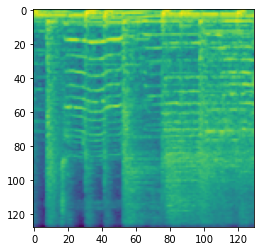

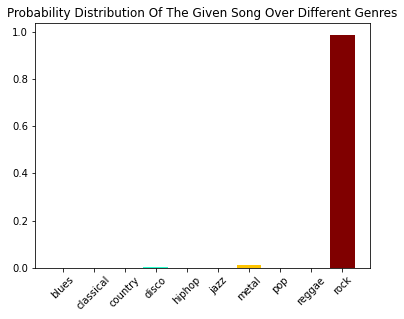

In [62]:
song ="NirvanaSmellsLikeTeenSpirit.wav"
show_output(song)

## The Genre of Song is  country


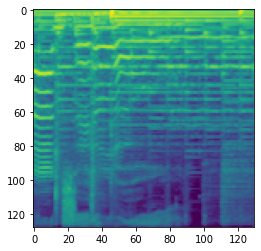

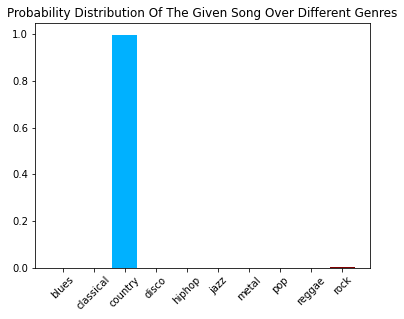

In [63]:
song ="TaylorSwiftLoveStory.wav"
show_output(song)